In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import joblib

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
seed = 29

In [4]:
df = pd.read_excel(r"datasets\smoking_prediction.xlsx")

In [6]:
df.head(11)

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,3.377083,0.043056,0.041667,0.041667,0.041667,...,0.506250,0.041667,0.004861,0.750000,0.791667,1.125000,Y,0,Y,0
1,1,F,40,160,60,3.375000,0.005556,0.004167,0.041667,0.041667,...,0.504861,0.041667,0.004167,0.916667,0.791667,0.750000,Y,0,Y,0
2,2,M,55,170,60,3.333333,0.005556,0.005556,0.041667,0.041667,...,0.630556,0.041667,0.041667,0.875000,0.666667,0.916667,Y,0,N,1
3,3,M,40,165,70,3.666667,0.045139,0.045139,0.041667,0.041667,...,0.588194,0.041667,0.041667,0.791667,1.083333,0.750000,Y,0,Y,0
4,4,F,40,155,60,3.583333,0.041667,0.041667,0.041667,0.041667,...,0.503472,0.041667,0.004167,0.666667,0.583333,0.916667,Y,0,N,0
5,5,M,30,180,75,3.541667,0.043056,0.043056,0.041667,0.041667,...,0.668056,0.041667,0.043056,0.750000,1.125000,1.375000,Y,0,Y,0
6,6,M,40,160,60,3.545139,0.041667,0.041667,0.041667,0.041667,...,0.708333,0.041667,0.004861,0.875000,1.125000,1.625000,Y,1,Y,1
7,7,M,45,165,90,4.000000,0.043056,0.041667,0.041667,0.041667,...,0.625000,0.041667,0.043750,1.583333,2.958333,4.625000,Y,0,Y,0
8,9,F,50,150,60,3.541667,0.004861,0.005556,0.041667,0.041667,...,0.546528,0.041667,0.005556,1.291667,1.291667,0.583333,Y,0,N,0
9,10,M,45,175,75,3.708333,0.041667,0.041667,0.041667,0.041667,...,0.666667,0.041667,0.005556,1.083333,1.000000,2.625000,Y,0,N,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   50000 non-null  int64  
 1   gender               50000 non-null  object 
 2   age                  50000 non-null  int64  
 3   height(cm)           50000 non-null  int64  
 4   weight(kg)           50000 non-null  int64  
 5   waist(cm)            50000 non-null  float64
 6   eyesight(left)       50000 non-null  float64
 7   eyesight(right)      50000 non-null  float64
 8   hearing(left)        50000 non-null  float64
 9   hearing(right)       50000 non-null  float64
 10  systolic             50000 non-null  float64
 11  relaxation           50000 non-null  float64
 12  fasting blood sugar  50000 non-null  float64
 13  Cholesterol          50000 non-null  float64
 14  triglyceride         50000 non-null  float64
 15  HDL                  50000 non-null 

In [10]:
df.isna().sum()/df.shape[0]

ID                     0.0
gender                 0.0
age                    0.0
height(cm)             0.0
weight(kg)             0.0
waist(cm)              0.0
eyesight(left)         0.0
eyesight(right)        0.0
hearing(left)          0.0
hearing(right)         0.0
systolic               0.0
relaxation             0.0
fasting blood sugar    0.0
Cholesterol            0.0
triglyceride           0.0
HDL                    0.0
LDL                    0.0
hemoglobin             0.0
Urine protein          0.0
serum creatinine       0.0
AST                    0.0
ALT                    0.0
Gtp                    0.0
oral                   0.0
dental caries          0.0
tartar                 0.0
smoking                0.0
dtype: float64

In [11]:
df.shape

(50000, 27)

In [12]:
df.columns

Index(['ID', 'gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'oral', 'dental caries',
       'tartar', 'smoking'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   50000 non-null  int64  
 1   gender               50000 non-null  object 
 2   age                  50000 non-null  int64  
 3   height(cm)           50000 non-null  int64  
 4   weight(kg)           50000 non-null  int64  
 5   waist(cm)            50000 non-null  float64
 6   eyesight(left)       50000 non-null  float64
 7   eyesight(right)      50000 non-null  float64
 8   hearing(left)        50000 non-null  float64
 9   hearing(right)       50000 non-null  float64
 10  systolic             50000 non-null  float64
 11  relaxation           50000 non-null  float64
 12  fasting blood sugar  50000 non-null  float64
 13  Cholesterol          50000 non-null  float64
 14  triglyceride         50000 non-null  float64
 15  HDL                  50000 non-null 

In [14]:
df.gender.unique()

array(['F', 'M'], dtype=object)

In [16]:
df.oral.unique()

array(['Y'], dtype=object)

In [17]:
df.tartar.unique()

array(['Y', 'N'], dtype=object)

In [18]:
df.describe()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,26284.994580,44.189300,164.652000,65.878700,3.414852,0.028446,0.028304,0.042736,0.042758,5.062531,...,2.387543,4.790698,0.593785,0.045290,0.018821,1.093193,1.129345,1.668142,0.213120,0.366580
std,16015.070567,12.090086,9.208778,12.831355,0.386765,0.024007,0.024216,0.006588,0.006655,0.570100,...,0.615559,1.709238,0.065870,0.016872,0.018432,0.827986,1.327431,2.110347,0.409516,0.481875
min,0.000000,20.000000,130.000000,30.000000,2.125000,0.000694,0.000694,0.041667,0.041667,2.958333,...,0.166667,0.041667,0.172917,0.041667,0.000694,0.250000,0.041667,0.041667,0.000000,0.000000
25%,12499.750000,40.000000,160.000000,55.000000,3.166667,0.005556,0.005556,0.041667,0.041667,4.666667,...,1.958333,3.833333,0.545833,0.041667,0.005556,0.791667,0.625000,0.708333,0.000000,0.000000
50%,24999.500000,40.000000,165.000000,65.000000,3.416667,0.041667,0.041667,0.041667,0.041667,5.000000,...,2.291667,4.708333,0.588889,0.041667,0.006250,0.958333,0.875000,1.041667,0.000000,0.000000
75%,40034.250000,55.000000,170.000000,75.000000,3.666667,0.043056,0.043056,0.041667,0.041667,5.416667,...,2.750000,5.666667,0.630556,0.041667,0.041667,1.208333,1.291667,1.833333,0.000000,1.000000
max,55690.000000,85.000000,190.000000,135.000000,5.375000,0.381250,0.381250,0.083333,0.083333,10.000000,...,25.750000,77.500000,0.875694,0.250000,0.462500,54.625000,121.416667,41.625000,1.000000,1.000000


**IMPORTANTE**!!! hacer una visualizacion - 1-histograma + kde 2-boxplot 3-scatterplot 4-cor plot  >>> **IMPORTANTE**!!

⭐ **Mapa de Correlación**

Correlación Positiva Fuerte (color rojo intenso): Indica que cuando esta variable sube, la probabilidad de ser fumador también sube. Anota las 2-3 variables con la correlación positiva más alta.

Correlación Negativa Fuerte (color azul intenso): Indica que cuando esta variable sube, la probabilidad de ser fumador baja. Anota las 2-3 con la correlación negativa más alta.

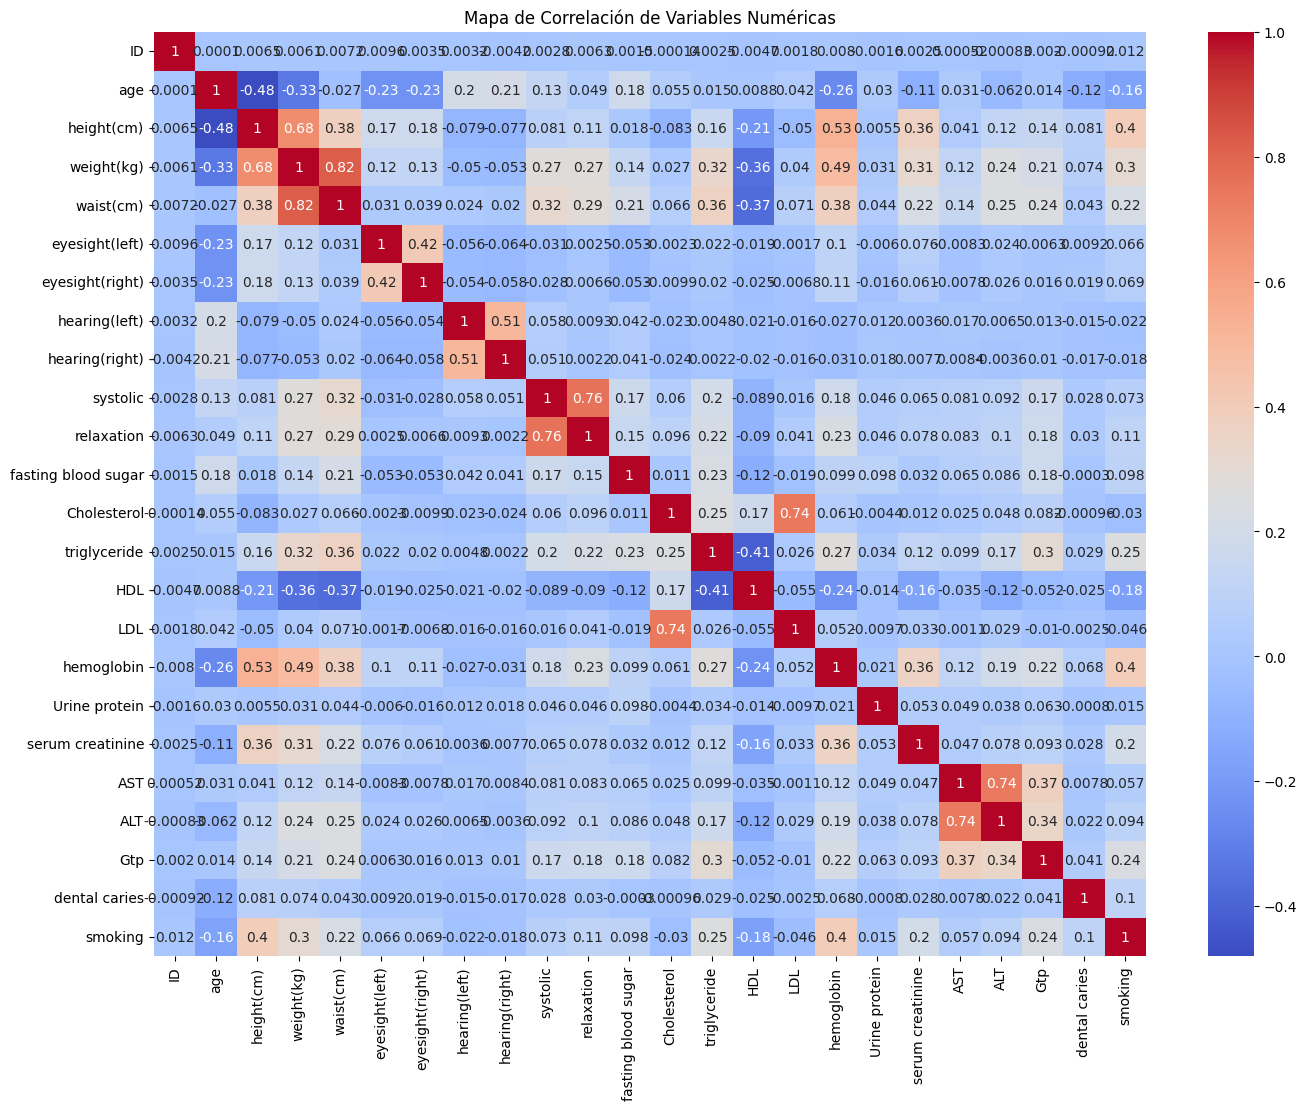

In [19]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(16, 12))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm') # annot=True si quieres ver los números
plt.title('Mapa de Correlación de Variables Numéricas')
plt.show()

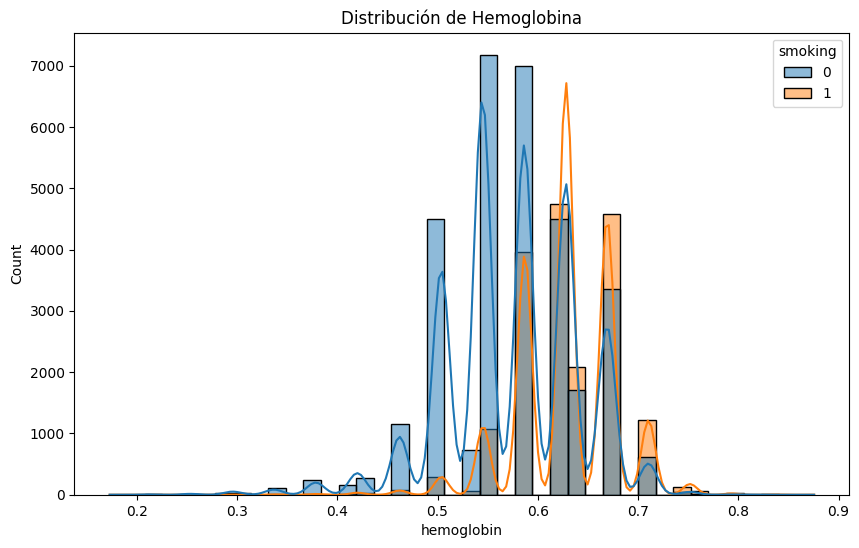

In [20]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='hemoglobin', bins=40, kde=True, hue='smoking')
plt.title('Distribución de Hemoglobina')
plt.show()

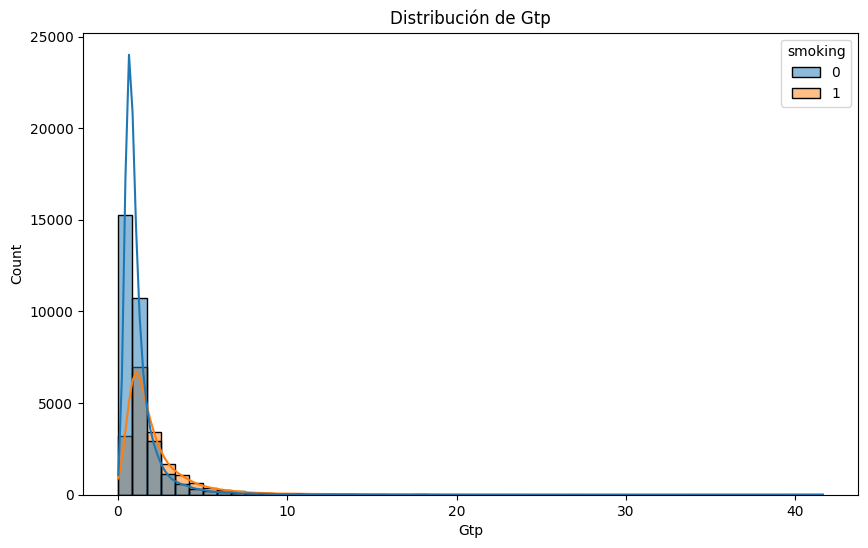

In [21]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Gtp', bins=50, kde=True, hue='smoking')
plt.title('Distribución de Gtp')
plt.show()

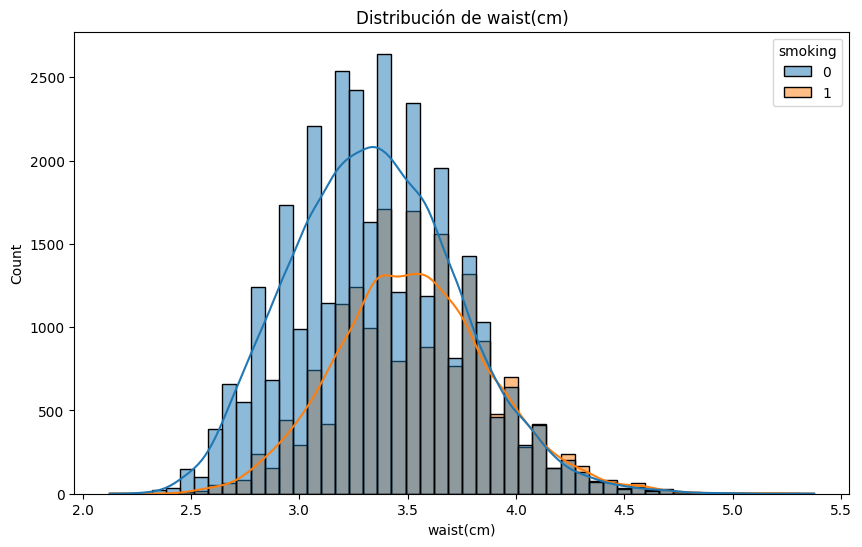

In [22]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='waist(cm)', bins=50, kde=True, hue='smoking')
plt.title('Distribución de waist(cm)')
plt.show()

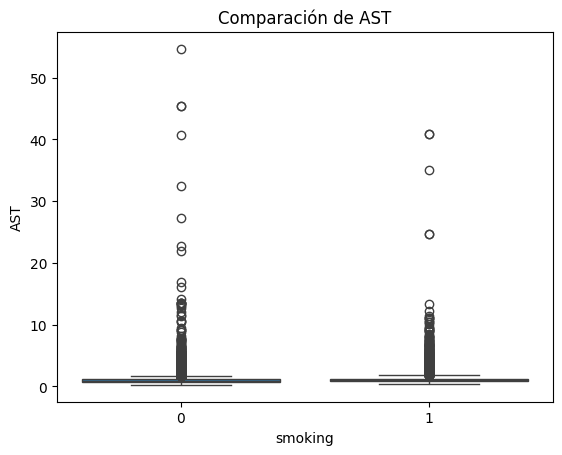

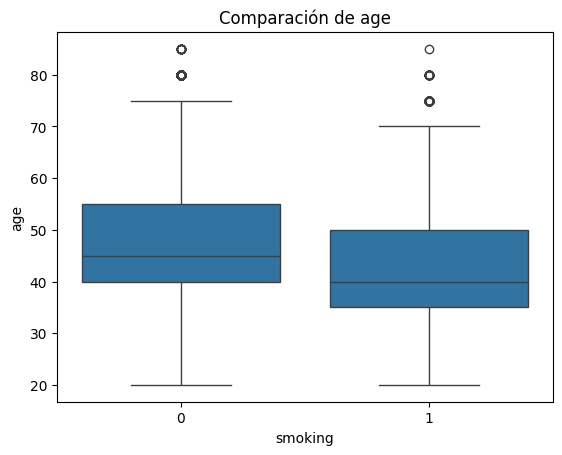

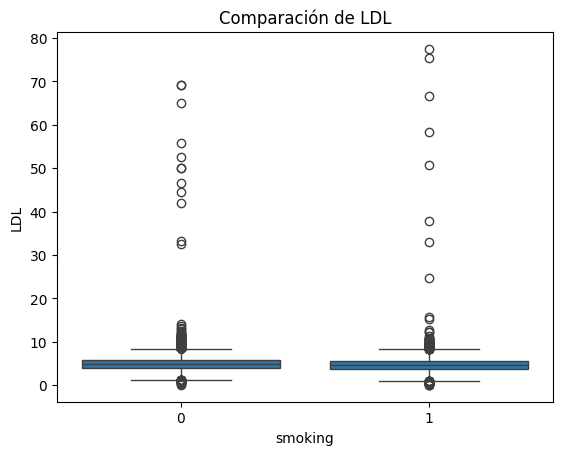

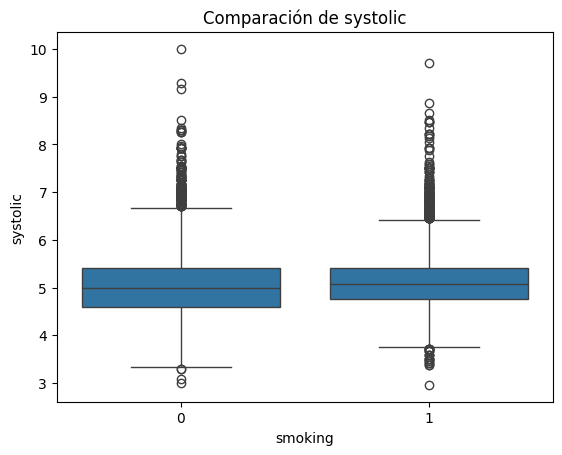

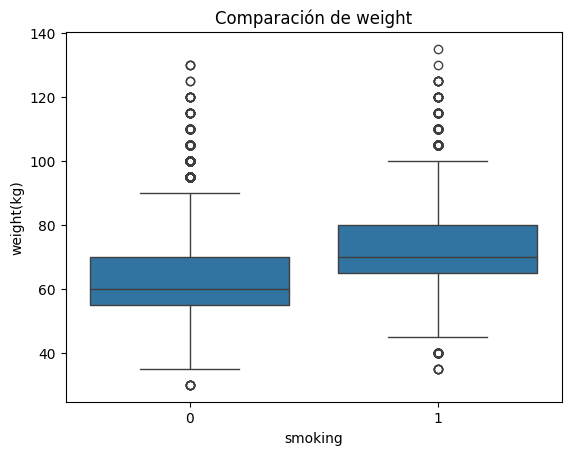

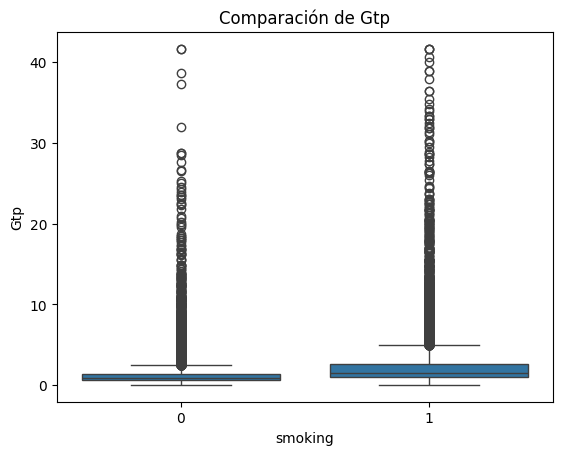

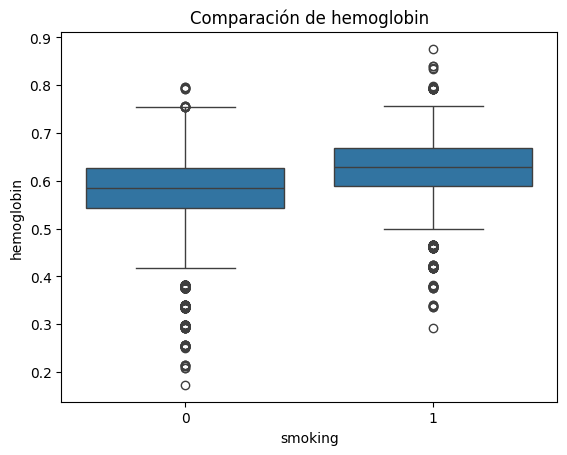

In [23]:
sns.boxplot(data=df, x='smoking', y='AST')
plt.title('Comparación de AST')
plt.show()

sns.boxplot(data=df, x='smoking', y='age')
plt.title('Comparación de age')
plt.show()

sns.boxplot(data=df, x='smoking', y='LDL')
plt.title('Comparación de LDL')
plt.show()

sns.boxplot(data=df, x='smoking', y='systolic')
plt.title('Comparación de systolic')
plt.show()

sns.boxplot(data=df, x='smoking', y='weight(kg)')
plt.title('Comparación de weight')
plt.show()

sns.boxplot(data=df, x='smoking', y='Gtp')
plt.title('Comparación de Gtp')
plt.show()

sns.boxplot(data=df, x='smoking', y='hemoglobin')
plt.title('Comparación de hemoglobin')
plt.show()

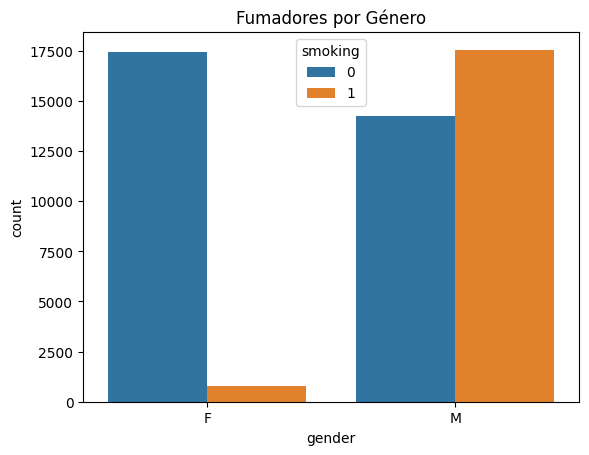

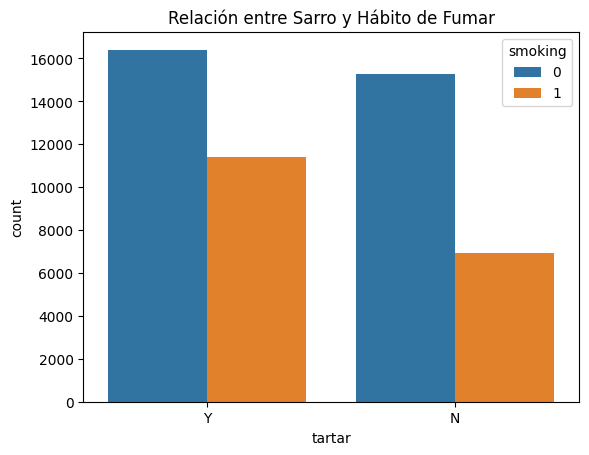

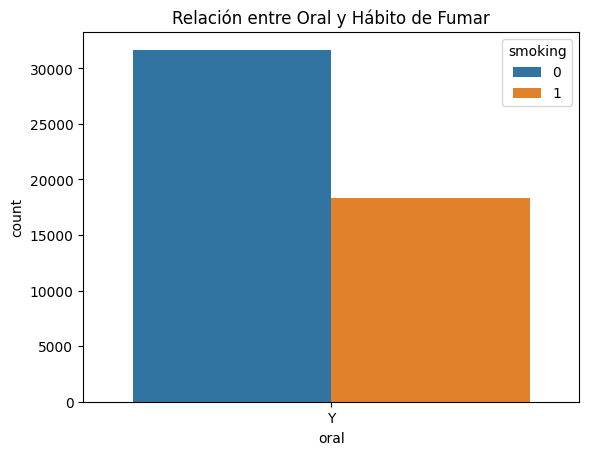

In [24]:
sns.countplot(data=df, x='gender', hue='smoking')
plt.title('Fumadores por Género')
plt.show()

sns.countplot(data=df, x='tartar', hue='smoking')
plt.title('Relación entre Sarro y Hábito de Fumar')
plt.show()

sns.countplot(data=df, x='oral', hue='smoking')
plt.title('Relación entre Oral y Hábito de Fumar')
plt.show()



*   'ID' **Eliminada por se irrelevante;**
*   'oral' **Eliminada por tener varianza cero;**
*   'weight(kg)', 'AST', 'oral', 'eyesight(left)','eyesight(right)', 'hearing(left)', 'hearing(right)' **no aporta información relevante para el modelo**.


In [25]:
to_drop = ['ID', 'weight(kg)', 'AST', 'oral','tartar', 'serum creatinine', 'Urine protein', 'relaxation', 'eyesight(left)','eyesight(right)', 'hearing(left)', 'hearing(right)', 'dental caries']
df = df.drop(columns=to_drop)
df.head()

,gender,age,height(cm),waist(cm),systolic,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,ALT,Gtp,smoking
0,F,40,155,3.377083,4.750000,3.916667,8.958333,3.416667,3.041667,5.250000,0.506250,0.791667,1.125000,0
1,F,40,160,3.375000,4.958333,5.416667,8.000000,4.791667,1.750000,5.291667,0.504861,0.791667,0.750000,0
2,M,55,170,3.333333,5.750000,3.708333,10.083333,7.583333,2.291667,6.291667,0.630556,0.666667,0.916667,1
3,M,40,165,3.666667,4.166667,4.000000,13.416667,10.583333,1.875000,9.416667,0.588194,1.083333,0.750000,0
4,F,40,155,3.583333,5.000000,3.333333,7.666667,3.083333,2.583333,4.458333,0.503472,0.583333,0.916667,0


In [26]:
df.smoking.value_counts(normalize=True)*100

smoking
0    63.342
1    36.658
Name: proportion, dtype: float64

In [27]:
df.columns

Index(['gender', 'age', 'height(cm)', 'waist(cm)', 'systolic',
       'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL',
       'hemoglobin', 'ALT', 'Gtp', 'smoking'],
      dtype='object')

In [28]:
X = df.drop("smoking", axis=1).copy()
y = df.smoking.copy()

In [29]:
X

,gender,age,height(cm),waist(cm),systolic,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,ALT,Gtp
0,F,40,155,3.377083,4.750000,3.916667,8.958333,3.416667,3.041667,5.250000,0.506250,0.791667,1.125000
1,F,40,160,3.375000,4.958333,5.416667,8.000000,4.791667,1.750000,5.291667,0.504861,0.791667,0.750000
2,M,55,170,3.333333,5.750000,3.708333,10.083333,7.583333,2.291667,6.291667,0.630556,0.666667,0.916667
3,M,40,165,3.666667,4.166667,4.000000,13.416667,10.583333,1.875000,9.416667,0.588194,1.083333,0.750000
4,F,40,155,3.583333,5.000000,3.333333,7.666667,3.083333,2.583333,4.458333,0.503472,0.583333,0.916667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,M,50,160,2.961806,5.083333,4.125000,5.916667,1.291667,2.625000,3.041667,0.547917,0.583333,0.916667
49996,M,30,170,3.333333,4.666667,3.708333,6.666667,6.000000,2.250000,3.208333,0.629167,1.208333,0.750000
49997,M,20,165,3.541667,5.208333,3.958333,6.541667,11.916667,1.958333,2.208333,0.670833,1.458333,2.916667
49998,F,60,160,2.961806,4.916667,3.916667,7.875000,5.750000,2.583333,4.125000,0.584028,0.666667,1.041667


In [30]:
y

0        0
1        0
2        1
3        0
4        0
        ..
49995    1
49996    1
49997    1
49998    0
49999    1
Name: smoking, Length: 50000, dtype: int64

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed, stratify=y)

In [33]:
y_train.value_counts(normalize=True)*100

smoking
0    63.3425
1    36.6575
Name: proportion, dtype: float64

In [34]:
y_test.value_counts(normalize=True)*100

smoking
0    63.34
1    36.66
Name: proportion, dtype: float64

In [35]:
X_train

,gender,age,height(cm),waist(cm),systolic,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,ALT,Gtp
48623,M,40,170,3.546528,5.208333,3.750000,9.333333,4.250000,2.041667,6.416667,0.669444,1.083333,0.833333
17231,M,25,175,3.958333,5.541667,4.083333,9.083333,5.750000,2.333333,5.583333,0.670833,2.083333,7.166667
36527,F,40,155,3.458333,4.041667,3.708333,8.541667,4.125000,2.625000,5.083333,0.503472,0.458333,0.666667
24460,M,25,170,3.750000,4.583333,3.416667,8.333333,2.625000,3.041667,4.083333,0.628472,1.250000,0.791667
23052,F,40,155,3.250000,4.958333,3.583333,8.958333,8.208333,2.000000,5.333333,0.543750,0.541667,0.875000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11643,M,35,175,4.000000,5.833333,6.833333,8.000000,6.333333,2.041667,4.708333,0.625000,1.458333,3.250000
14887,F,55,145,3.458333,5.541667,6.125000,8.833333,4.875000,3.041667,4.791667,0.630556,2.208333,6.916667
27864,M,50,170,3.541667,4.916667,3.625000,10.250000,7.708333,1.458333,7.250000,0.668750,1.333333,3.041667
2399,M,25,165,3.295139,5.083333,4.083333,7.250000,2.416667,2.750000,4.000000,0.625694,0.541667,0.666667


In [36]:
X_test

,gender,age,height(cm),waist(cm),systolic,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,ALT,Gtp
32995,M,30,175,3.541667,4.666667,3.916667,6.416667,2.541667,2.125000,3.750000,0.668750,2.333333,3.458333
1343,M,25,160,3.291667,4.916667,4.458333,7.625000,2.416667,2.291667,4.833333,0.626389,0.583333,0.916667
39211,M,20,165,3.171528,4.375000,3.875000,6.083333,2.333333,2.333333,3.291667,0.587500,0.458333,1.041667
10789,M,30,160,3.916667,5.416667,3.666667,6.583333,11.208333,1.708333,3.625000,0.589583,0.916667,1.333333
23883,F,60,150,3.083333,5.416667,5.041667,11.041667,6.666667,3.291667,6.416667,0.589583,1.041667,4.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19039,F,40,145,2.750000,5.541667,3.791667,9.791667,3.833333,2.791667,6.250000,0.542361,0.583333,1.125000
33864,M,45,160,3.500000,5.416667,4.625000,7.166667,4.083333,2.041667,4.291667,0.672222,1.166667,2.458333
14603,F,50,155,3.583333,4.875000,3.958333,7.333333,2.208333,2.375000,4.500000,0.545139,0.333333,0.666667
11645,F,50,150,3.710417,4.750000,4.166667,9.666667,4.625000,2.375000,6.375000,0.377778,0.458333,0.625000


In [37]:
X_train.gender.unique()

array(['M', 'F'], dtype=object)

In [38]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40000 entries, 48623 to 6235
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               40000 non-null  object 
 1   age                  40000 non-null  int64  
 2   height(cm)           40000 non-null  int64  
 3   waist(cm)            40000 non-null  float64
 4   systolic             40000 non-null  float64
 5   fasting blood sugar  40000 non-null  float64
 6   Cholesterol          40000 non-null  float64
 7   triglyceride         40000 non-null  float64
 8   HDL                  40000 non-null  float64
 9   LDL                  40000 non-null  float64
 10  hemoglobin           40000 non-null  float64
 11  ALT                  40000 non-null  float64
 12  Gtp                  40000 non-null  float64
dtypes: float64(10), int64(2), object(1)
memory usage: 4.3+ MB


In [41]:

# 1. Defines las columnas categóricas
categorical_features = ['gender']

# 2. Defines el preprocesador que sabe qué hacer con cada tipo de columna
preprocessor = ColumnTransformer(
    transformers=[
        # Aplica OneHotEncoder a las columnas categóricas y elimina la primera para evitar redundancia
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ],
    # Deja las demás columnas (las numéricas) tal como están
    remainder='passthrough'
)

# 3. Defines el Pipeline que une el preprocesador y el modelo en un solo objeto
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=seed, n_jobs=-1)) #class_weight='balanced', random_state=seed, n_jobs=-1
    #('classifier', RandomForestClassifier(class_weight='balanced', max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=200, random_state=seed, n_jobs=-1))
])

# 4. Ahora, simplemente entrenas el pipeline con los datos ORIGINALES (sin procesar)
pipeline_rf.fit(X_train, y_train)

c:\Users\basta\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['gender'])])),
                ('classifier',
                 RandomForestClassifier(n_jobs=-1, random_state=29))])

In [42]:
X_train

,gender,age,height(cm),waist(cm),systolic,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,ALT,Gtp
48623,M,40,170,3.546528,5.208333,3.750000,9.333333,4.250000,2.041667,6.416667,0.669444,1.083333,0.833333
17231,M,25,175,3.958333,5.541667,4.083333,9.083333,5.750000,2.333333,5.583333,0.670833,2.083333,7.166667
36527,F,40,155,3.458333,4.041667,3.708333,8.541667,4.125000,2.625000,5.083333,0.503472,0.458333,0.666667
24460,M,25,170,3.750000,4.583333,3.416667,8.333333,2.625000,3.041667,4.083333,0.628472,1.250000,0.791667
23052,F,40,155,3.250000,4.958333,3.583333,8.958333,8.208333,2.000000,5.333333,0.543750,0.541667,0.875000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11643,M,35,175,4.000000,5.833333,6.833333,8.000000,6.333333,2.041667,4.708333,0.625000,1.458333,3.250000
14887,F,55,145,3.458333,5.541667,6.125000,8.833333,4.875000,3.041667,4.791667,0.630556,2.208333,6.916667
27864,M,50,170,3.541667,4.916667,3.625000,10.250000,7.708333,1.458333,7.250000,0.668750,1.333333,3.041667
2399,M,25,165,3.295139,5.083333,4.083333,7.250000,2.416667,2.750000,4.000000,0.625694,0.541667,0.666667


# **RandomForestClassifier**

In [43]:
train_pred_rf = pipeline_rf.predict(X_train)
test_pred_rf = pipeline_rf.predict(X_test)
print("Resultados del Random Forest:")
print(classification_report(y_train, train_pred_rf))
print(classification_report(y_test, test_pred_rf))

Resultados del Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25337
           1       1.00      1.00      1.00     14663

    accuracy                           1.00     40000
   macro avg       1.00      1.00      1.00     40000
weighted avg       1.00      1.00      1.00     40000

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      6334
           1       0.71      0.73      0.72      3666

    accuracy                           0.79     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.79      0.79      0.79     10000



## RandomForestClassifier usando 'RandomizedSearchCV' para buscar una optimización del modelo

In [46]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# 1. Define una DISTRIBUCIÓN de parámetros con regularización más FUERTE
#    Usamos distribuciones como randint para que RandomizedSearchCV explore más eficientemente.
param_dist = {
    # Mantenemos un número razonable de árboles
    'classifier__n_estimators': randint(250, 400),

    # Probamos con menos features para aumentar la diversidad de los árboles
    'classifier__max_features': ['sqrt', 'log2', 0.2, 0.3],

    # --- PARÁMETROS CLAVE PARA REGULARIZACIÓN ---
    # Forzamos a los árboles a ser menos profundos
    'classifier__max_depth': randint(1, 10),

    # Forzamos a que las hojas finales tengan un número MÁS ALTO de muestras
    'classifier__min_samples_leaf': randint(5, 15),

    # Forzamos a que las divisiones necesiten un número MÁS ALTO de muestras
    'classifier__min_samples_split': randint(10, 30),

    # EXTRA: Muy útil para datasets desbalanceados
    'classifier__class_weight': [None]
}

# 2. Configura y ejecuta la BÚSQUEDA ALEATORIA
#    n_iter=60 -> Probará 60 combinaciones al azar (mucho más rápido que GridSearchCV)
#    n_jobs=-1 -> Usa todos los núcleos de tu CPU
random_search = RandomizedSearchCV(
    estimator=pipeline_rf,
    param_distributions=param_dist,
    n_iter=30,
    cv=5,
    scoring='f1_weighted',
    verbose=1,
    n_jobs=-1,
    random_state=seed
)

# 3. Entrena el modelo
random_search.fit(X_train, y_train)

# 4. Muestra los mejores parámetros (probablemente serán más restrictivos)
print(f"Mejores parámetros encontrados: {random_search.best_params_}")
mejor_modelo = random_search.best_estimator_

# 5. Evalúa el modelo final. La clave es observar si la diferencia entre Train y Test se redujo.
print("\n--- Reporte del Modelo Final (Train) ---")
train_pred = mejor_modelo.predict(X_train)
print(classification_report(y_train, train_pred))

print("\n--- Reporte del Modelo Final (Test) ---")
test_pred = mejor_modelo.predict(X_test)
print(classification_report(y_test, test_pred))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Mejores parámetros encontrados: {'classifier__class_weight': None, 'classifier__max_depth': 9, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 7, 'classifier__min_samples_split': 16, 'classifier__n_estimators': 283}

--- Reporte del Modelo Final (Train) ---
              precision    recall  f1-score   support

           0       0.86      0.80      0.82     25337
           1       0.68      0.77      0.72     14663

    accuracy                           0.79     40000
   macro avg       0.77      0.78      0.77     40000
weighted avg       0.79      0.79      0.79     40000


--- Reporte del Modelo Final (Test) ---
              precision    recall  f1-score   support

           0       0.83      0.78      0.80      6334
           1       0.65      0.73      0.69      3666

    accuracy                           0.76     10000
   macro avg       0.74      0.75      0.75     10000
weighted avg       0

In [47]:
# Después de entrenar tu random_search...
mejor_modelo_rf = random_search.best_estimator_.named_steps['classifier']
importancias = mejor_modelo_rf.feature_importances_

# Crea un DataFrame para verlo más claro
df_importancias = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importancias
}).sort_values('importance', ascending=False)

print(df_importancias)

                feature  importance
0                gender    0.350995
2            height(cm)    0.168274
10           hemoglobin    0.138025
12                  Gtp    0.121176
7          triglyceride    0.059862
1                   age    0.038889
11                  ALT    0.025750
3             waist(cm)    0.022904
8                   HDL    0.017964
9                   LDL    0.015680
4              systolic    0.013990
5   fasting blood sugar    0.013383
6           Cholesterol    0.013107


## en 'df_importancias' veo las variables mas importantes para el modelo y elimino las que son menores al 0.01 para agilizar el modelo perdiendo la menor precisión posible.

In [48]:
# Usa tu mejor modelo ya entrenado (el pipeline completo)
y_pred_proba = mejor_modelo.predict_proba(X_test)

# Miremos las primeras 5 predicciones
print("Probabilidades predichas (No Fumador, Fumador):")
print(y_pred_proba[:5])

# Para trabajar más fácil, nos quedamos solo con las probabilidades de la clase positiva (fumador)
probabilidades_fumador = y_pred_proba[:, 1]
print("\nProbabilidades de ser Fumador:")
print(probabilidades_fumador[:5])

Probabilidades predichas (No Fumador, Fumador):
[[0.42104176 0.57895824]
 [0.57702849 0.42297151]
 [0.50076077 0.49923923]
 [0.43086927 0.56913073]
 [0.89967932 0.10032068]]

Probabilidades de ser Fumador:
[0.57895824 0.42297151 0.49923923 0.56913073 0.10032068]


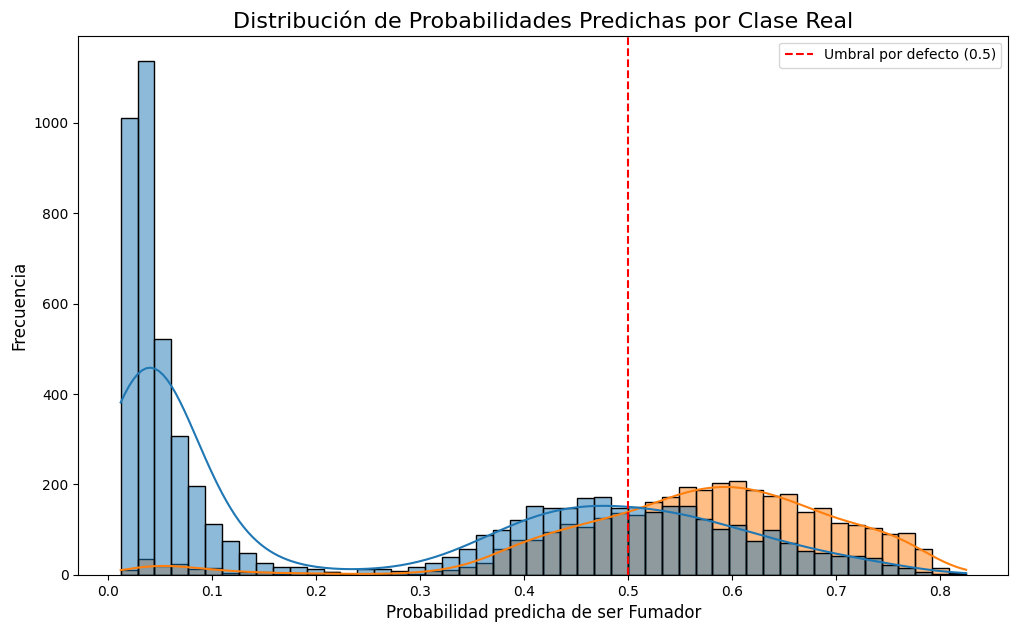

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Creamos un DataFrame para facilitar la visualización
df_probabilidades = pd.DataFrame({'probabilidad_fumador': probabilidades_fumador, 'real': y_test})

plt.figure(figsize=(12, 7))
sns.histplot(data=df_probabilidades, x='probabilidad_fumador', hue='real', kde=True, bins=50)
plt.title('Distribución de Probabilidades Predichas por Clase Real', fontsize=16)
plt.xlabel('Probabilidad predicha de ser Fumador', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(title='Clase Real', labels=['Fumador (1)', 'No Fumador (0)'])
plt.axvline(0.5, color='red', linestyle='--', label='Umbral por defecto (0.5)')
plt.legend()
plt.show()

## Defino de forma manual el umbral

In [49]:
# Evalúa el modelo final
print("\n--- Reporte del Modelo Final (Train) ---")
train_pred = mejor_modelo.predict(X_train)
print(classification_report(y_train, train_pred))

# Predicciones usando el umbral por defecto de 0.5
y_pred_test_default = mejor_modelo.predict(X_test)

print("--- REPORTE DE CLASIFICACIÓN (UMBRAL POR DEFECTO = 0.5) ---")
print(classification_report(y_test, y_pred_test_default))

# 1. Obtenemos las probabilidades para el conjunto de test
probabilidades_test = mejor_modelo.predict_proba(X_test)

# 2. Nos quedamos solo con la probabilidad de la clase positiva (fumador, que es la segunda columna)
prob_fumador_test = probabilidades_test[:, 1]

# 3. Definimos nuestro nuevo umbral
nuevo_umbral = 0.45

# 4. Generamos las nuevas predicciones. Si la probabilidad es > 0.45, es 1 (fumador), sino 0.
y_pred_test_nuevo_umbral = (prob_fumador_test >= nuevo_umbral).astype(int)

print(f"--- REPORTE DE CLASIFICACIÓN (NUEVO UMBRAL = {nuevo_umbral}) ---")
print(classification_report(y_test, y_pred_test_nuevo_umbral))


--- Reporte del Modelo Final (Train) ---
              precision    recall  f1-score   support

           0       0.86      0.80      0.82     25337
           1       0.68      0.77      0.72     14663

    accuracy                           0.79     40000
   macro avg       0.77      0.78      0.77     40000
weighted avg       0.79      0.79      0.79     40000

--- REPORTE DE CLASIFICACIÓN (UMBRAL POR DEFECTO = 0.5) ---
              precision    recall  f1-score   support

           0       0.83      0.78      0.80      6334
           1       0.65      0.73      0.69      3666

    accuracy                           0.76     10000
   macro avg       0.74      0.75      0.75     10000
weighted avg       0.77      0.76      0.76     10000

--- REPORTE DE CLASIFICACIÓN (NUEVO UMBRAL = 0.45) ---
              precision    recall  f1-score   support

           0       0.88      0.69      0.78      6334
           1       0.61      0.84      0.71      3666

    accuracy             

## sacrifico precision(4%) por recall(10%), porq en lo q estoy interesado es en encontrar los fumadores! y ahora tengo un .83 en recall de fumadores

In [51]:

# 1. Elige la ruta COMPLETA donde quieres guardar el modelo
ruta_destino = r'modelo'

# 2. Elige un nombre para el archivo
nombre_archivo = 'modelo_fumador_v2.6.joblib'

# 3. Combina la ruta y el nombre del archivo
ruta_completa = os.path.join(ruta_destino, nombre_archivo)

# 4. Asegúrate de que el directorio exista antes de guardar
os.makedirs(ruta_destino, exist_ok=True)

# 5. Usa joblib.dump para guardar el pipeline en la ruta especificada
joblib.dump(mejor_modelo, ruta_completa)

print(f"¡Modelo guardado exitosamente en la ruta '{ruta_completa}'!")

¡Modelo guardado exitosamente en la ruta 'modelo\modelo_fumador_v2.6.joblib'!


## Cargo el modelo y un db para una nueva predicción

In [52]:
import joblib
import pandas as pd
# --- 1. Cargar el modelo entrenado y el umbral óptimo ---
# Carga el pipeline completo que incluye el preprocesador y el clasificador.
try:
    modelo_cargado = joblib.load(ruta_completa)
except FileNotFoundError:
    print("Error: No se encontró el archivo 'modelo_fumador_v2.5.joblib'.")
    print("Asegúrate de ejecutar primero la celda que guarda el modelo.")
    # Si 'mejor_modelo' todavía existe en la sesión actual, podemos usarlo.
    try:
        modelo_cargado = mejor_modelo
        print("Usando el 'mejor_modelo' que ya está en memoria.")
    except NameError:
        print("No se pudo cargar ningún modelo. Deteniendo la ejecución.")
        exit()

# Este es el umbral cargado manualmente.
umbral_optimo = 0.45

# --- 2. Cargar y preparar los nuevos datos ---
# Reemplaza 'nuevos_datos_para_predecir.csv' con el nombre de tu archivo.
try:
    nuevos_datos_df = pd.read_excel(r"datasets\smoking_prediction_entrega.xlsx")
except FileNotFoundError:
    print("Error: No se encontró el archivo 'smoking_prediction_entrega.xlsx - smoking_prediction.csv'.")
    print("Asegúrate de que el archivo esté en la misma carpeta o proporciona la ruta correcta.")
    # Para demostración, usamos X_test si no hay archivo nuevo.
    # Esta parte generará un error si X_test no está definido, es solo para el try-except.
    # print("Usando el conjunto X_test para la demostración.")
    # nuevos_datos_df = X_test.copy()
    exit()

# IMPORTANTE: Asegúrate de que los nuevos datos tengan las mismas columnas
# con las que se entrenó el modelo. Asumiendo que to_drop está definida.
# Si no lo está, deberías definirla aquí. Ejemplo:
# to_drop = ['columna1', 'columna2']

# Se eliminan las mismas columnas que se quitaron en el preprocesamiento original.
# Usamos 'errors="ignore"' para evitar errores si alguna columna ya no existe.
# NOTA: La variable 'to_drop' debe estar definida en tu sesión.
try:
    columnas_a_eliminar = to_drop
    X_nuevos = nuevos_datos_df.drop(columns=columnas_a_eliminar, errors='ignore')
except NameError:
    print("La variable 'to_drop' no está definida. No se eliminarán columnas.")
    X_nuevos = nuevos_datos_df.copy()


# Si tu nuevo CSV tiene la columna 'smoking', quítala también antes de predecir.
if 'smoking' in X_nuevos.columns:
    X_nuevos = X_nuevos.drop(columns=['smoking'])

# --- 3. Realizar la predicción ---
# El pipeline se encarga automáticamente del preprocesamiento (OneHotEncoder).
# Primero obtenemos las probabilidades para ambas clases.
probabilidades = modelo_cargado.predict_proba(X_nuevos)

# Nos quedamos con la probabilidad de la clase "1" (fumador).
probabilidad_fumador = probabilidades[:, 1]

# Aplicamos el umbral para obtener la clase final: 0 o 1.
prediccion_final_clase = (probabilidad_fumador >= umbral_optimo).astype(int)

# --- 4. Generar el reporte en el DataFrame ---
# Agregamos las probabilidades y la predicción final al DataFrame original para una fácil revisión.
nuevos_datos_df['probabilidad_fumador'] = probabilidad_fumador
nuevos_datos_df['prediccion_fumador_clase'] = prediccion_final_clase

# Mostramos las primeras filas del DataFrame con los resultados.
# La columna 'prediccion_fumador_clase' contiene el 0 o 1 que necesitas.
print("Primeras 20 filas del reporte generado:")
print(nuevos_datos_df[['ID', 'probabilidad_fumador', 'prediccion_fumador_clase']].head(20))


Primeras 20 filas del reporte generado:
       ID  probabilidad_fumador  prediccion_fumador_clase
0   27358              0.441704                         0
1   27364              0.566251                         1
2   27368              0.703675                         1
3   27378              0.470844                         1
4   27381              0.560731                         1
5   27386              0.524916                         1
6   27388              0.516843                         1
7   27393              0.031205                         0
8   27406              0.032759                         0
9   27417              0.602180                         1
10  27418              0.036754                         0
11  27419              0.413502                         0
12  27421              0.585145                         1
13  27425              0.556901                         1
14  27431              0.062269                         0
15  27439              0.036217 

In [54]:

# --- 5. Exportar a Excel (solo las columnas seleccionadas) ---

# Define las columnas que quieres guardar en el reporte
columnas_a_guardar = ['ID', 'probabilidad_fumador', 'prediccion_fumador_clase']

# Crea un nuevo DataFrame que contiene ÚNICAMENTE esas columnas
ruta_destino_entrega = r'prediction_result'
reporte_final_df = nuevos_datos_df[columnas_a_guardar]

# Define el nombre del archivo de salida
nombre_archivo_excel = 'schimizzi_reporte_prediccion_fumadores.xlsx'
ruta_completa = os.path.join(ruta_destino_entrega, nombre_archivo_excel)

# Guarda este nuevo DataFrame resumido en un archivo de Excel
os.makedirs(ruta_destino, exist_ok=True)
reporte_final_df.to_excel(ruta_completa, index=False)

print(f"\n¡Éxito! El reporte resumido ha sido guardado en el archivo '{nombre_archivo_excel}'.")
print("El archivo contiene solo las columnas: ID, probabilidad_fumador, y prediccion_fumador_clase.")


¡Éxito! El reporte resumido ha sido guardado en el archivo 'schimizzi_reporte_prediccion_fumadores.xlsx'.
El archivo contiene solo las columnas: ID, probabilidad_fumador, y prediccion_fumador_clase.
